# Bank customer churn prediction model

# Python with importing libraries such as pandas, numpy,seaborn,warnings 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [2]:
# we have a CSV file named
df = pd.read_csv('Churn_Modelling.csv')

# Data Exploration and Visualization

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Dropping Irrelevant Features

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical Data

In [12]:
df = pd.get_dummies(df,drop_first = True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


# Some insights about the target variable

In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='count'>

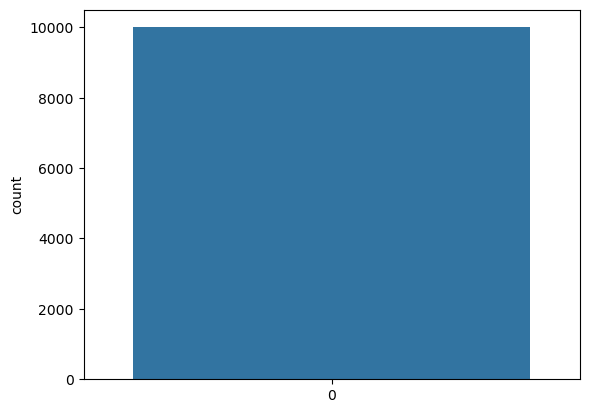

In [15]:
sns.countplot(df['Exited'])

In [16]:
X = df.drop('Exited',axis=1)
y = df['Exited']

# Handling Imbalanced Data with SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [19]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [20]:
X_res.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    True               False            True           1
688          46   5       164186.289173  1              0          0               93320.642234     True               True             True           1
             39   0       123561.876961  1              1          0               114994.890473    True               False            False          1
                  7       150698.812899  1              0          1               51746.133906     True               True             True           1
             40   6       0.000000       1              1          1               47886.440000     False              False            True           1
                                                                                       

<Axes: ylabel='count'>

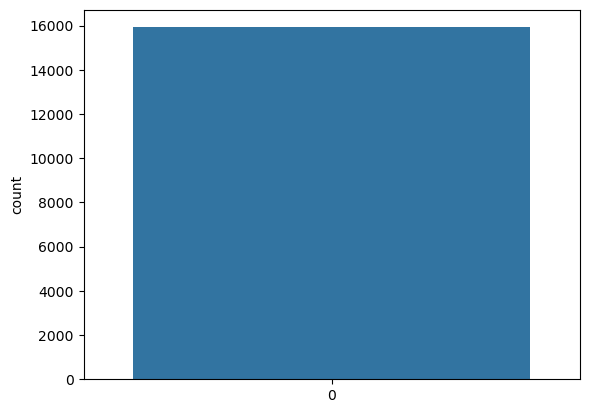

In [21]:
sns.countplot(y_res)

## Splitting The Dataset into Training Set and Test Set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler 

In [25]:
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Scaling

In [27]:
X_train

array([[ 0.76619521, -0.90497452,  0.79970979, ..., -0.76050387,
         1.58292779, -1.21863228],
       [-0.66715385, -0.80531871,  1.16573043, ..., -0.76050387,
        -0.63174076,  0.82059208],
       [-1.30781744,  0.19123939,  0.79970979, ..., -0.76050387,
         1.58292779,  0.82059208],
       ...,
       [ 1.91721794,  0.58986263, -1.03039341, ..., -0.76050387,
         1.58292779,  0.82059208],
       [ 0.48386888, -1.00463033, -1.39641406, ..., -0.76050387,
        -0.63174076,  0.82059208],
       [ 1.63489161,  2.1843556 , -1.39641406, ..., -0.76050387,
        -0.63174076, -1.21863228]])

In [28]:
X_test

array([[-0.67801255,  0.98848588, -1.03039341, ..., -0.76050387,
        -0.63174076,  0.82059208],
       [-0.21108824, -0.7056629 ,  0.43368915, ..., -0.76050387,
         1.58292779,  0.82059208],
       [ 0.86392356,  0.09158358, -0.29835213, ...,  1.3149177 ,
        -0.63174076,  0.82059208],
       ...,
       [ 1.91721794, -0.50635128, -0.66437277, ..., -0.76050387,
        -0.63174076, -1.21863228],
       [ 0.7444778 ,  0.68951844, -1.03039341, ..., -0.76050387,
        -0.63174076, -1.21863228],
       [ 1.67832643, -1.00463033,  1.53175108, ..., -0.76050387,
        -0.63174076,  0.82059208]])

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()

In [31]:
log.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred1)

0.7639179573043114

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
precision_score(y_test, y_pred1)

0.7505180273518441

In [37]:
recall_score(y_test, y_pred1)

0.7749251176722294

In [38]:
f1_score(y_test,y_pred1)

0.7625263157894737

## SVC

In [39]:
from sklearn import svm

In [40]:
svm = svm.SVC()

In [41]:
svm.fit(X_train,y_train)

SVC()

In [42]:
y_pred2=svm.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred2)

0.8275429049811637

In [44]:
precision_score(y_test, y_pred2)

0.8307826847398339

In [45]:
recall_score(y_test, y_pred2)

0.8130081300813008

In [46]:
f1_score(y_test,y_pred2)

0.8217993079584776

## KNeighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred3=knn.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred3)

0.8049393051485978

In [52]:
precision_score(y_test, y_pred3)

0.7913728743260058

In [53]:
recall_score(y_test, y_pred3)

0.8164313222079589

In [54]:
f1_score(y_test,y_pred3)

0.8037068239258636

## Desicion Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred4=dt.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred4)

0.7904981163666807

In [60]:
precision_score(y_test, y_pred4)

0.774671052631579

In [61]:
recall_score(y_test, y_pred4)

0.8061617458279846

In [62]:
f1_score(y_test,y_pred4)

0.7901027469071084

## Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
y_pred5=rf.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred5)

0.8570531603181247

In [68]:
precision_score(y_test, y_pred5)

0.8531169940222032

In [69]:
recall_score(y_test, y_pred5)

0.8549422336328626

In [70]:
f1_score(y_test,y_pred5)

0.8540286385979909

## Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc = GradientBoostingClassifier()

In [73]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [74]:
y_pred6=gbc.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred6)

0.8317287568020092

In [76]:
precision_score(y_test,y_pred6)

0.8302455838000862

In [77]:
recall_score(y_test,y_pred6)

0.8245614035087719

In [78]:
f1_score(y_test,y_pred6)

0.8273937312151138

## XGBoost

In [79]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [80]:
y_pred7=model_xgb.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred7)

0.8520301381331101

In [82]:
precision_score(y_test,y_pred7)

0.8441722972972973

In [83]:
recall_score(y_test,y_pred6)

0.8245614035087719

In [84]:
f1_score(y_test,y_pred6)

0.8273937312151138

### Accuracy Summary

In [85]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [86]:
performance_summary

,Model,ACC
0,LR,0.763918
1,SVC,0.827543
2,KNN,0.804939
3,DT,0.790498
4,RF,0.857053
5,GBC,0.831729
6,XGB,0.852030


<Axes: xlabel='Model', ylabel='ACC'>

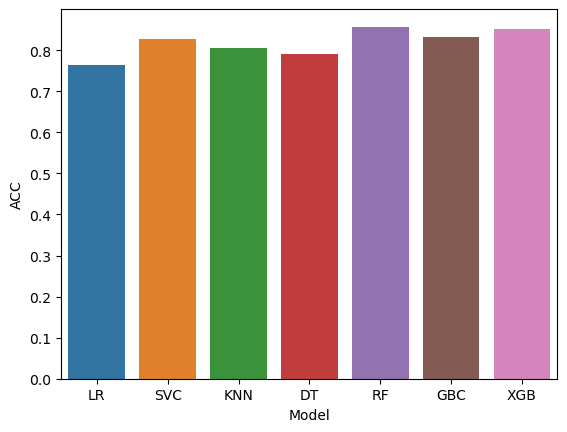

In [87]:
import seaborn as sns
import pandas as pd  

if not isinstance(performance_summary, pd.DataFrame):
  raise TypeError("performance_summary must be a pandas DataFrame")

if 'Model' not in performance_summary.columns or 'ACC' not in performance_summary.columns:
  raise ValueError("Missing columns 'Model' or 'ACC' in performance_summary")

sns.barplot(x = "Model", y = "ACC", data=performance_summary)


As we can see,Random Forest Classifier has highest accuracy

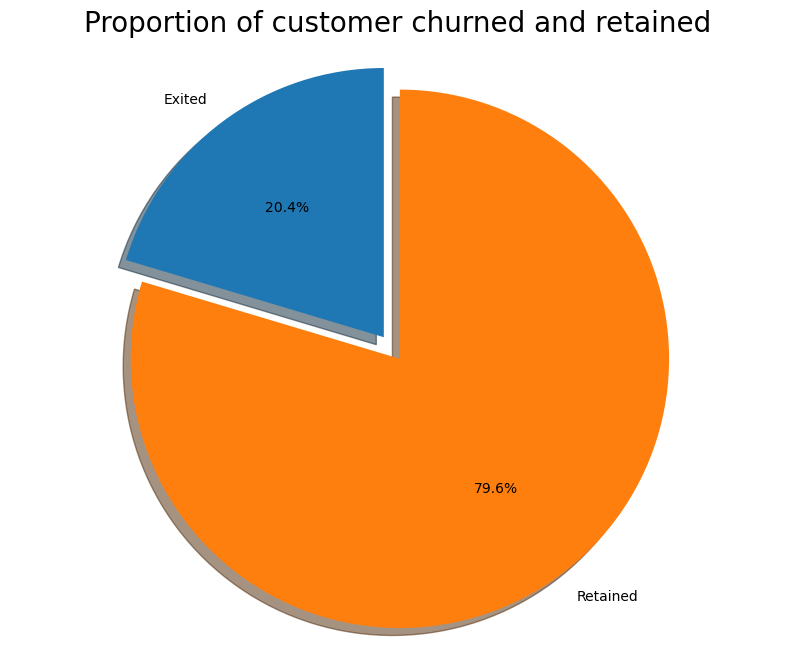

In [88]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()